# TP1 de IFT-3700
Mehdi Aqdim

Maxime Daigle

Adam Félix

Jonathan Graveline

## Preprocessing

### Charger les données

In [8]:
import numpy as np
import time

"""
    Mettre `skiprows=1` pour avoir toutes les données.
    (Mais c'est très long surtout pour faire des tests.)
"""
mnist_train = np.loadtxt('mnist_train.csv', dtype='int', delimiter=',', skiprows=55001)
mnist_test  = np.loadtxt('mnist_test.csv', dtype='int', delimiter=',', skiprows=9501)

train_label = mnist_train[:,0]
train_data  = mnist_train[:,1:]

test_label  = mnist_test[:,0]
test_data   = mnist_test[:,1:]

### Pixels noir ou blanc (0 ou 1)

In [3]:
from sklearn.preprocessing import Binarizer

def binarize(data, label):
    pp = Binarizer(10)
    pp.fit(train_data)
    data = pp.transform(data)

## Mesures

In [38]:
# distance euclidien
from sklearn.metrics import euclidean_distances

# Similarité cosine
# http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
from sklearn.metrics.pairwise import cosine_similarity

# Chi2 kernel
# http://scikit-learn.org/stable/modules/metrics.html#chi-squared-kernel
from sklearn.metrics.pairwise import chi2_kernel

# Sigmoid kernel
# http://scikit-learn.org/stable/modules/metrics.html#sigmoid-kernel
from sklearn.metrics.pairwise import sigmoid_kernel

# RBF kernel
# http://scikit-learn.org/stable/modules/metrics.html#rbf-kernel
from sklearn.metrics.pairwise import rbf_kernel

# Laplacian kernel
# http://scikit-learn.org/stable/modules/metrics.html#laplacian-kernel
from sklearn.metrics.pairwise import laplacian_kernel

# Polynomial kernel
# http://scikit-learn.org/stable/modules/metrics.html#polynomial-kernel
from sklearn.metrics.pairwise import polynomial_kernel

#
# Autre mesure possiblement interessante
# from scikit-learn: [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’]
# from scipy.spatial.distance: [‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘correlation’, ‘dice’, ‘hamming’, ‘jaccard’, 
#                               ‘kulsinski’, ‘mahalanobis’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, 
#                               ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’]
#

#Procrustes analysis
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.procrustes.html
from scipy.spatial import procrustes


## KNN

Algorithme de classification

In [38]:
from sklearn.neighbors import KNeighborsClassifier as knn

start = time.time()
# `metric` peut être `callable` ici.
algo = knn(n_neighbors=7, metric='euclidean', n_jobs=6)

algo.fit(train_data, train_label)

result = algo.score(test_data, test_label)
end = time.time()
print("Taux de succès avec knn et la distance euclidienne: %.4f %%" % (result * 100.0))
print(end-start, 'seconds')

# Avec 10000 train examples et 1000 test examples:
# Taux de succès avec knn et la distance euclidienne: 94.8000 %
# 3.6996114253997803 seconds

# Avec 5000 train examples et 500 test examples:
# Taux de succès avec knn et la distance euclidienne: 90.0000 %
# 0.9333090782165527 seconds

# Avec 1000 train examples et 500 test examples:
# Taux de succès avec knn et la distance euclidienne: 84.6000 %
# 0.23496222496032715 seconds

Taux de succès avec knn et la distance euclidienne: 94.8000 %
3.6996114253997803 seconds


In [39]:
start = time.time()
knn_l3 = knn(n_neighbors=7, metric='minkowski', p=3, n_jobs=-1)
knn_l3.fit(train_data, train_label)
result_l3 = knn_l3.score(test_data, test_label)

end = time.time()
print("Taux de succès avec knn et L3: %.4f %%" % (result_l3 * 100.0))
print(end-start, 'seconds')

# Avec 10000 train examples et 1000 test examples:
# Taux de succès avec knn et L3: 95.5000 %
# 28.261430978775024 seconds

# Avec 5000 train examples et 500 test examples:
# Taux de succès avec knn et L3: 90.8000 %
# 6.961097002029419 seconds

# Avec 1000 train examples et 500 test examples:
# Taux de succès avec knn et L3: 85.4000 %
# 1.25040864944458 seconds

Taux de succès avec knn et L3: 95.5000 %
28.261430978775024 seconds


In [ ]:
#too slow

# from scipy.spatial.distance import directed_hausdorff
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.directed_hausdorff.html#scipy.spatial.distance.directed_hausdorff

# def hausdorff_distance(u,v):
#     # general (symmetric) Hausdorff distance between two 2-D arrays of coordinates
#     u = u.reshape(u.shape[0],1)
#     v = v.reshape(v.shape[0],1)
#     return max(directed_hausdorff(u,v)[0], directed_hausdorff(v,u)[0])
# # hausdorff_distance(train_data[5], train_data[4])

# start = time.time()
# knn_hausdorff = knn(n_neighbors=7, metric=hausdorff_distance, n_jobs=-1)
# knn_hausdorff.fit(train_data, train_label)
# result_hausdorff = knn_hausdorff.score(test_data, test_label)

# end = time.time()
# print("Taux de succès avec knn et la distance Hausdorff: %.4f %%" % (result_hausdorff * 100.0))
# print(end-start, 'seconds')

In [36]:
def procrustes_similarity(u,v):
    u = u.reshape(u.shape[0],1)
    v = v.reshape(v.shape[0],1)
    return procrustes(u,v)[2]
# procrustes_similarity(train_data[1], train_data[4])

In [40]:
# Slow
# Plus robuste a la translation, rotation, etc que euclidien

start = time.time()
knn_procrustes = knn(n_neighbors=7, metric=procrustes_similarity, n_jobs=-1)
knn_procrustes.fit(train_data, train_label)
result_procrustes = knn_procrustes.score(test_data, test_label)

end = time.time()
print("Taux de succès avec knn et Procrustes analysis comme similarité: %.4f %%" % (result_procrustes * 100.0))
print(end-start, 'seconds')

# Avec 10000 train examples et 1000 test examples:
# Taux de succès avec knn et Procrustes analysis comme similarité: 96.5000 %
# 2965.029656648636 seconds (49 minutes)

# Avec 5000 train example et 500 test example:
# Taux de succès avec knn et Procrustes analysis comme similarité: 92.6000 %
# 741.8232653141022 seconds (12 minutes)

# Avec 1000 train examples et 500 test examples:
# Taux de succès avec knn et Procrustes analysis comme similarité: 89.4000 %
# 139.01943111419678 seconds (2 minutes 19 secondes)

Taux de succès avec knn et Procrustes analysis comme similarité: 96.5000 %
2965.029656648636 seconds


In [9]:
#Slow and Bad

from skimage.measure import compare_ssim as ssim
# http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.compare_ssim

# mean structural similarity index between two images
start = time.time()
knn_ssim = knn(n_neighbors=7, metric=ssim, n_jobs=-1)
knn_ssim.fit(train_data, train_label)
result_ssim = knn_ssim.score(test_data, test_label)

end = time.time()
print("Taux de succès avec knn et structural similarity index: %.4f %%" % (result_ssim * 100.0))
print(end-start, 'seconds')

# Avec 5000 train example et 500 test example:
# Taux de succès avec knn et structural similarity index: 0.8000 %
# 1294.130733013153 seconds (22 minutes)

Taux de succès avec knn et structural similarity index: 0.8000 %
1294.130733013153 seconds


## Partition binaire

In [11]:
# Dans la documentation ça semble être un classifieur qui utilise un arbre binaire
# Il sera possible d'y accéder plus tard
from sklearn.cluster import AgglomerativeClustering as BinaryTree

# `affinity` peut être `callable` ici.
# `linkage='average'` voir énoncé, dernier point de Conseils et indications
algo = BinaryTree(n_clusters=10, linkage='average', affinity='euclidean')

pred_labels = algo.fit_predict(train_data)

count_pred = np.zeros((10,10))

for i in range(10):
    for j in range(pred_labels.shape[0]):
        if train_label[j] == i:
            count_pred[i, pred_labels[j]] += 1

print("Distribution des prédictions (classes, prédictions):")
print(count_pred)

# Considérons la classe prédite la plus répéter comme la bonne classe
# (Ne pouvons nous pas toujours faire ça?)
correct_pred = np.array([np.max(count_pred[i]) for i in range(10)])

print("Max pour chaque classes:")
print(correct_pred)

result = (sum(correct_pred) / pred_labels.shape[0]) * 100.0

print("Taux de succès avec un arbre binaire et la distance euclidienne: %.4f %%" % (result))

Distribution des prédictions (classes, prédictions):
[[  6. 169.   0.   9.   0. 292.  13.   0.   0.   0.]
 [  0. 530.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 19. 468.   0.   3.   0.   3.   0.   0.   0.   0.]
 [ 22. 482.   0.   5.   0.   0.   0.   0.   0.   0.]
 [  0. 497.   0.   0.   2.   0.   0.   0.   0.   0.]
 [ 17. 424.   0.  16.   0.   0.   0.   1.   0.   0.]
 [  2. 401.   0.   0.   2.   0.  77.   0.   0.   0.]
 [  0. 563.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 16. 465.   2.   5.   0.   5.   0.   0.   1.   0.]
 [  1. 479.   0.   1.   0.   0.   1.   0.   0.   1.]]
Max pour chaque classes:
[292. 530. 468. 482. 497. 424. 401. 563. 465. 479.]
Taux de succès avec un arbre binaire et la distance euclidienne: 92.0200 %


## Isomap

Algorithme de reduction de dimensionnalite

##### Modified isomap from scikit learn to be able to change the metric used

In [9]:
"""Isomap for manifold learning"""

# Author: Jake Vanderplas  -- <vanderplas@astro.washington.edu>
# License: BSD 3 clause (C) 2011

import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import NearestNeighbors, kneighbors_graph
from sklearn.utils import check_array
from sklearn.utils.graph import graph_shortest_path
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import KernelCenterer

#_____________________________
# ____________ADDED___________
#_____________________________
""" 
It is now possible to specify the metric use in fit_transform()


metric : string or callable, default ‘minkowski’
metric to use for distance computation. Any metric from scikit-learn or scipy.spatial.distance can be used.

If metric is a callable function, it is called on each pair of instances (rows) and the resulting value recorded. 
The callable should take two arrays as input and return one value indicating the distance between them. 
This works for Scipy’s metrics, but is less efficient than passing the metric name as a string.

Distance matrices are not supported.

Valid values for metric are:
from scikit-learn: [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’]
from scipy.spatial.distance: [‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘correlation’, ‘dice’, ‘hamming’, ‘jaccard’, 
                              ‘kulsinski’, ‘mahalanobis’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, 
                              ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’]
"""


class Isomap(BaseEstimator, TransformerMixin):
    """Isomap Embedding
    Non-linear dimensionality reduction through Isometric Mapping
    Read more in the :ref:`User Guide <isomap>`.
    Parameters
    ----------
    n_neighbors : integer
        number of neighbors to consider for each point.
    n_components : integer
        number of coordinates for the manifold
    eigen_solver : ['auto'|'arpack'|'dense']
        'auto' : Attempt to choose the most efficient solver
        for the given problem.
        'arpack' : Use Arnoldi decomposition to find the eigenvalues
        and eigenvectors.
        'dense' : Use a direct solver (i.e. LAPACK)
        for the eigenvalue decomposition.
    tol : float
        Convergence tolerance passed to arpack or lobpcg.
        not used if eigen_solver == 'dense'.
    max_iter : integer
        Maximum number of iterations for the arpack solver.
        not used if eigen_solver == 'dense'.
    path_method : string ['auto'|'FW'|'D']
        Method to use in finding shortest path.
        'auto' : attempt to choose the best algorithm automatically.
        'FW' : Floyd-Warshall algorithm.
        'D' : Dijkstra's algorithm.
    neighbors_algorithm : string ['auto'|'brute'|'kd_tree'|'ball_tree']
        Algorithm to use for nearest neighbors search,
        passed to neighbors.NearestNeighbors instance.
    n_jobs : int or None, optional (default=None)
        The number of parallel jobs to run.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.
    Attributes
    ----------
    embedding_ : array-like, shape (n_samples, n_components)
        Stores the embedding vectors.
    kernel_pca_ : object
        `KernelPCA` object used to implement the embedding.
    training_data_ : array-like, shape (n_samples, n_features)
        Stores the training data.
    nbrs_ : sklearn.neighbors.NearestNeighbors instance
        Stores nearest neighbors instance, including BallTree or KDtree
        if applicable.
    dist_matrix_ : array-like, shape (n_samples, n_samples)
        Stores the geodesic distance matrix of training data.
    Examples
    --------
    >>> from sklearn.datasets import load_digits
    >>> from sklearn.manifold import Isomap
    >>> X, _ = load_digits(return_X_y=True)
    >>> X.shape
    (1797, 64)
    >>> embedding = Isomap(n_components=2)
    >>> X_transformed = embedding.fit_transform(X[:100])
    >>> X_transformed.shape
    (100, 2)
    References
    ----------
    .. [1] Tenenbaum, J.B.; De Silva, V.; & Langford, J.C. A global geometric
           framework for nonlinear dimensionality reduction. Science 290 (5500)
    """
    
    def __init__(self, n_neighbors=5, n_components=2, eigen_solver='auto',
                 tol=0, max_iter=None, path_method='auto',
                 neighbors_algorithm='auto', n_jobs=None):
        self.n_neighbors = n_neighbors
        self.n_components = n_components
        self.eigen_solver = eigen_solver
        self.tol = tol
        self.max_iter = max_iter
        self.path_method = path_method
        self.neighbors_algorithm = neighbors_algorithm
        self.n_jobs = n_jobs

    ##_____________________________
    ##added metric = ''minkowski'
    ##_____________________________
    def _fit_transform(self, X, metric = 'minkowski'):
        X = check_array(X, accept_sparse='csr')
        
        ##__________________________________________________
        ##added metric=metric
        ##_________________________________________________
        self.nbrs_ = NearestNeighbors(n_neighbors=self.n_neighbors,
                                      algorithm=self.neighbors_algorithm,
                                      n_jobs=self.n_jobs, metric=metric)
        self.nbrs_.fit(X)
        self.training_data_ = self.nbrs_._fit_X
        self.kernel_pca_ = KernelPCA(n_components=self.n_components,
                                     kernel="precomputed",
                                     eigen_solver=self.eigen_solver,
                                     tol=self.tol, max_iter=self.max_iter,
                                     n_jobs=self.n_jobs)
        ##____________________________________________________
        ##added metric=metric
        ##____________________________________________________
        kng = kneighbors_graph(self.nbrs_, self.n_neighbors,
                               mode='distance', n_jobs=self.n_jobs, metric = metric)

        self.dist_matrix_ = graph_shortest_path(kng,
                                                method=self.path_method,
                                                directed=False)
        G = self.dist_matrix_ ** 2
        G *= -0.5

        self.embedding_ = self.kernel_pca_.fit_transform(G)

    def reconstruction_error(self):
        """Compute the reconstruction error for the embedding.
        Returns
        -------
        reconstruction_error : float
        Notes
        -------
        The cost function of an isomap embedding is
        ``E = frobenius_norm[K(D) - K(D_fit)] / n_samples``
        Where D is the matrix of distances for the input data X,
        D_fit is the matrix of distances for the output embedding X_fit,
        and K is the isomap kernel:
        ``K(D) = -0.5 * (I - 1/n_samples) * D^2 * (I - 1/n_samples)``
        """
        G = -0.5 * self.dist_matrix_ ** 2
        G_center = KernelCenterer().fit_transform(G)
        evals = self.kernel_pca_.lambdas_
        return np.sqrt(np.sum(G_center ** 2) - np.sum(evals ** 2)) / G.shape[0]

    def fit(self, X, y=None):
        """Compute the embedding vectors for data X
        Parameters
        ----------
        X : {array-like, sparse matrix, BallTree, KDTree, NearestNeighbors}
            Sample data, shape = (n_samples, n_features), in the form of a
            numpy array, precomputed tree, or NearestNeighbors
            object.
        y : Ignored
        Returns
        -------
        self : returns an instance of self.
        """
        self._fit_transform(X)
        return self

    ##_____________________________
    ##added metric = ''minkowski'
    ##_____________________________
    def fit_transform(self, X, y=None, metric = 'minkowski'):
        """Fit the model from data in X and transform X.
        Parameters
        ----------
        X : {array-like, sparse matrix, BallTree, KDTree}
            Training vector, where n_samples in the number of samples
            and n_features is the number of features.
        y : Ignored
        Returns
        -------
        X_new : array-like, shape (n_samples, n_components)
        """
        ##_____________________________
        ##added metric
        ##_____________________________
        self._fit_transform(X, metric)
        return self.embedding_

    def transform(self, X):
        """Transform X.
        This is implemented by linking the points X into the graph of geodesic
        distances of the training data. First the `n_neighbors` nearest
        neighbors of X are found in the training data, and from these the
        shortest geodesic distances from each point in X to each point in
        the training data are computed in order to construct the kernel.
        The embedding of X is the projection of this kernel onto the
        embedding vectors of the training set.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
        Returns
        -------
        X_new : array-like, shape (n_samples, n_components)
        """
        X = check_array(X)
        distances, indices = self.nbrs_.kneighbors(X, return_distance=True)

        # Create the graph of shortest distances from X to self.training_data_
        # via the nearest neighbors of X.
        # This can be done as a single array operation, but it potentially
        # takes a lot of memory.  To avoid that, use a loop:
        G_X = np.zeros((X.shape[0], self.training_data_.shape[0]))
        for i in range(X.shape[0]):
            G_X[i] = np.min(self.dist_matrix_[indices[i]] +
                            distances[i][:, None], 0)

        G_X **= 2
        G_X *= -0.5

        return self.kernel_pca_.transform(G_X)

In [10]:
# Isomap reduisant à 2d
iso_2d = Isomap(n_components=2, n_jobs=-1)

#Isomap with euclidean distance
start = time.time()
iso_pos_euclidean = iso_2d.fit_transform(train_data, metric = 'euclidean')
end = time.time()
print(end-start, 'seconds')

# Avec 1000 train examples:
# 0.7821276187896729 seconds

0.7821276187896729 seconds


In [11]:
#Isomap with cosine similarity
start = time.time()
iso_pos_cosine = iso_2d.fit_transform(train_data, metric='cosine')
end = time.time()
print(end-start, 'seconds')

# Avec 1000 train examples:
# 2.7805633544921875 seconds

2.7805633544921875 seconds


In [12]:
#Isomap with Procrustes similarity
start = time.time()
iso_pos_procrustes = iso_2d.fit_transform(train_data, metric=procrustes_similarity)
end = time.time()
print(end-start, 'seconds')

# Avec 1000 train examples:
# 309.665470123291 seconds (5 minutes)

309.665470123291 seconds


## PCoA

Algorithme de reduction de dimensionnalite

In [9]:
seed = np.random.RandomState(seed=3)

from sklearn.manifold import MDS

#PCoA reducing to 2 dimensions
mds = MDS(n_components=2, random_state=seed, dissimilarity="precomputed", n_jobs=-1)

distance euclidien 

In [33]:
start = time.time()
similarities_euclidean = euclidean_distances(train_data)
pos_euclidean = mds.fit(similarities_euclidean).embedding_
end = time.time()
print(end-start, 'seconds')

# Avec 1000 train examples:
# 22.67337155342102 seconds

NameError: name 'euclidean_distances' is not defined

In [34]:
def procrustes_matrix(X):
    #environ 80 secondes pour creer une matrice (1000,1000)
    result = np.zeros((X.shape[0],X.shape[0]))
    for i in range(X.shape[0]):
        for j in range(i, X.shape[0]):
            result[i,j] = result[j,i] = procrustes_similarity(X[i],X[j])
    return result

In [30]:
start = time.time()
similarities_procrustes = procrustes_matrix(train_data)
pos_procrustes = mds.fit(similarities_procrustes).embedding_
end = time.time()
print(end-start, 'seconds')

# Avec 1000 train examples et 500 test examples:
# 101.51754379272461 seconds

101.51754379272461 seconds


Similarité cosine

http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity

In [ ]:
start = time.time()
similarities = cosine_similarity(train_data)
pos_cosine = mds.fit(similarities).embedding_
end = time.time()
print(end-start, 'seconds')

Chi2 kernel

http://scikit-learn.org/stable/modules/metrics.html#chi-squared-kernel

In [ ]:
start = time.time()
similarities = chi2_kernel(train_data)
pos_chi2 = mds.fit(similarities).embedding_
end = time.time()
print(end-start, 'seconds')

Sigmoid kernel

http://scikit-learn.org/stable/modules/metrics.html#sigmoid-kernel

In [ ]:
start = time.time()
similarities = sigmoid_kernel(train_data)
pos_sigmoid = mds.fit(similarities).embedding_
end = time.time()
print(end-start, 'seconds')

RBF kernel

http://scikit-learn.org/stable/modules/metrics.html#rbf-kernel

In [ ]:
start = time.time()
similarities = rbf_kernel(train_data)
pos_rbf = mds.fit(similarities).embedding_
end = time.time()
print(end-start, 'seconds')

Laplacian kernel

http://scikit-learn.org/stable/modules/metrics.html#laplacian-kernel

In [ ]:
start = time.time()
similarities = laplacian_kernel(train_data)
pos_laplacian = mds.fit(similarities).embedding_
end = time.time()
print(end-start, 'seconds')

Polynomial kernel

http://scikit-learn.org/stable/modules/metrics.html#polynomial-kernel

In [ ]:
start = time.time()
similarities = polynomial_kernel(train_data)
pos_polynomial = mds.fit(similarities).embedding_
end = time.time()
print(end-start, 'seconds')

### Visualize Dimensionality reduction in 2d

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
def visualize_2d(pos,title):
    fig, ax = plt.subplots()
    colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),(0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)
    for i in range(pos.shape[0]):
        ax.scatter(pos[i,0],pos[i,1],label = train_label[i],color=colors[train_label[i]])

    #remove duplicate in legend
    handles,labels=ax.get_legend_handles_labels()
    handles_unique, labels_unique = [],[]
    seen = set()
    for i,e in enumerate(labels):
        if e not in seen:
            seen.add(e)
            handles_unique.append(handles[i])
            labels_unique.append(e)
            if len(seen) == 10:
                break

    #sort legend
    labels_unique, handles_unique = (list(l) for l in zip(*sorted(zip(labels_unique, handles_unique))))

    plt.legend(handles_unique,labels_unique,loc="best")
    plt.title(title)
    plt.show()


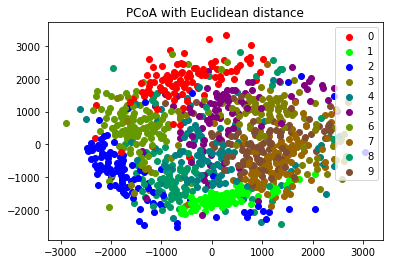

In [31]:
#Example: visualization of euclidean distance
visualize_2d(pos_euclidean, "PCoA with Euclidean distance")

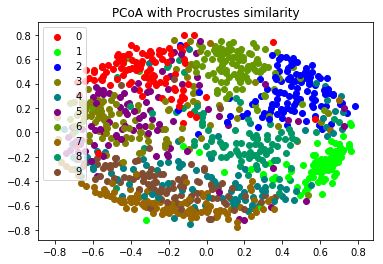

In [32]:
visualize_2d(pos_procrustes, "PCoA with Procrustes similarity")

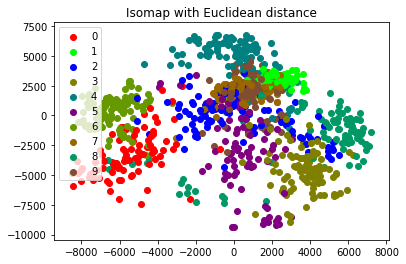

In [17]:
visualize_2d(iso_pos_euclidean, 'Isomap with Euclidean distance')

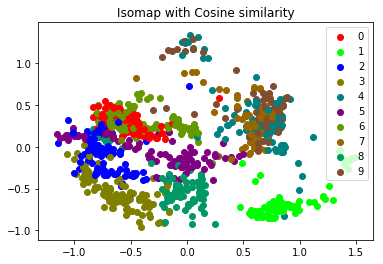

In [18]:
visualize_2d(iso_pos_cosine, 'Isomap with Cosine similarity')

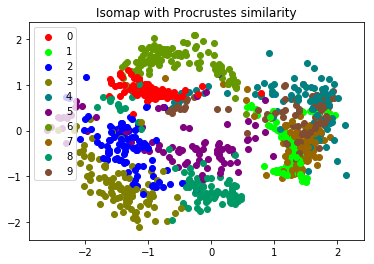

In [19]:
visualize_2d(iso_pos_procrustes, 'Isomap with Procrustes similarity')

## K-medoids
modified code from 
https://github.com/terkkila/scikit-learn/blob/kmedoids/sklearn/cluster/k_medoids_.py 
with https://github.com/scikit-learn/scikit-learn/blob/bac89c253b35a8f1a3827389fbee0f5bebcbc985/sklearn/base.py

In [27]:
"""K-medoids clustering"""

# Authors: Timo Erkkilä <timo.erkkila@gmail.com>
#          Antti Lehmussola <antti.lehmussola@gmail.com>
# License: BSD 3 clause

import numpy as np
import warnings

from sklearn.base import BaseEstimator, ClusterMixin, TransformerMixin
from sklearn.metrics.pairwise import PAIRWISE_DISTANCE_FUNCTIONS
from sklearn.utils import check_array, check_random_state
from sklearn.utils.validation import check_is_fitted


class KMedoids(BaseEstimator, ClusterMixin, TransformerMixin):
    """
    k-medoids class.
    Parameters
    ----------
    n_clusters : int, optional, default: 8
        How many medoids. Must be positive.
    distance_metric : string, optional, default: 'euclidean'
        What distance metric to use.
    clustering : {'pam'}, optional, default: 'pam'
        What clustering mode to use.
    init : {'random', 'heuristic'}, optional, default: 'heuristic'
        Specify medoid initialization.
    max_iter : int, optional, default : 300
        Specify the maximum number of iterations when fitting.
    random_state : int, optional, default: None
        Specify random state for the random number generator.
    """

    # Supported clustering methods
    CLUSTERING_METHODS = ['pam']

    # Supported initialization methods
    INIT_METHODS = ['random', 'heuristic']

    def __init__(self, n_clusters=8, distance_metric='euclidean',
                 clustering_method='pam', init='heuristic',
                 max_iter=300, random_state=None):

        self.n_clusters = n_clusters

        self.distance_metric = distance_metric

        self.init = init

        self.max_iter = max_iter

        self.clustering_method = clustering_method

        self.random_state = random_state

    def _check_init_args(self):

        # Check n_clusters
        if self.n_clusters is None or self.n_clusters <= 0 or \
                not isinstance(self.n_clusters, int):
            raise ValueError("n_clusters has to be nonnegative integer")

        # Check distance_metric
        if callable(self.distance_metric):
            self.distance_func = self.distance_metric
        elif self.distance_metric in PAIRWISE_DISTANCE_FUNCTIONS:
            self.distance_func = \
                PAIRWISE_DISTANCE_FUNCTIONS[self.distance_metric]
        else:
            raise ValueError("distance_metric needs to be " +
                             "callable or one of the " +
                             "following strings: " +
                             "{}".format(PAIRWISE_DISTANCE_FUNCTIONS.keys()) +
                             ". Instead, '{}' ".format(self.distance_metric) +
                             "was given.")

        # Check clustering_method
        if self.clustering_method not in self.CLUSTERING_METHODS:
            raise ValueError("clustering must be one of the following: " +
                             "{}".format(self.CLUSTERING_METHODS))

        # Check init
        if self.init not in self.INIT_METHODS:
            raise ValueError("init needs to be one of " +
                             "the following: " +
                             "{}".format(self.INIT_METHODS))

        # Check random state
        self.random_state_ = check_random_state(self.random_state)

    def fit(self, X, y=None):
        """Fit K-Medoids to the provided data.
        Parameters
        ----------
        X : array-like or sparse matrix, shape=(n_samples, n_features)
        Returns
        -------
        self
        """

        self._check_init_args()

        # Check that the array is good and attempt to convert it to
        # Numpy array if possible
        X = self._check_array(X)

        # Apply distance metric to get the distance matrix
        D = self.distance_func(X)

        medoid_ics = self._get_initial_medoid_indices(D, self.n_clusters)

        # Old medoids will be stored here for reference
        old_medoid_ics = np.zeros((self.n_clusters,))

        # Continue the algorithm as long as
        # the medoids keep changing and the maximum number
        # of iterations is not exceeded
        self.n_iter_ = 0
        while not np.all(old_medoid_ics == medoid_ics) and \
                self.n_iter_ < self.max_iter:

            self.n_iter_ += 1

            # Keep a copy of the old medoid assignments
            old_medoid_ics = np.copy(medoid_ics)

            # Get cluster indices
            cluster_ics = self._get_cluster_ics(D, medoid_ics)

            # Update medoids with the new cluster indices
            self._update_medoid_ics_in_place(D, cluster_ics, medoid_ics)

        # Expose labels_ which are the assignments of
        # the training data to clusters
        self.labels_ = cluster_ics

        # Expose cluster centers, i.e. medoids
        self.cluster_centers_ = X.take(medoid_ics, axis=0)

        # Return self to enable method chaining
        return self

    def _check_array(self, X):

        X = check_array(X)

        # Check that the number of clusters is less than or equal to
        # the number of samples
        if self.n_clusters > X.shape[0]:
            raise ValueError("The number of medoids " +
                             "({}) ".format(self.n_clusters) +
                             "must be larger than the number " +
                             "of samples ({})".format(X.shape[0]))

        return X

    def _get_cluster_ics(self, D, medoid_ics):
        """Returns cluster indices for D and current medoid indices"""

        # Assign data points to clusters based on
        # which cluster assignment yields
        # the smallest distance
        cluster_ics = np.argmin(D[medoid_ics, :], axis=0)

        return cluster_ics

    def _update_medoid_ics_in_place(self, D, cluster_ics, medoid_ics):
        """In-place update of the medoid indices"""

        # Update the medoids for each cluster
        for cluster_idx in range(self.n_clusters):

            if sum(cluster_ics == cluster_idx) == 0:
                warnings.warn("Cluster {} is empty!".format(cluster_idx))
                continue

            # Find current cost that is associated with cluster_idx.
            # Cost is the sum of the distance from the cluster
            # members to the medoid.
            curr_cost = np.sum(D[medoid_ics[cluster_idx],
                                 cluster_ics == cluster_idx])

            # Extract the distance matrix between the data points
            # inside the cluster_idx
            D_in = D[cluster_ics == cluster_idx, :]
            D_in = D_in[:, cluster_ics == cluster_idx]

            # Calculate all costs there exists between all
            # the data points in the cluster_idx
            all_costs = np.sum(D_in, axis=1)

            # Find the index for the smallest cost in cluster_idx
            min_cost_idx = np.argmin(all_costs)

            # find the value of the minimum cost in cluster_idx
            min_cost = all_costs[min_cost_idx]

            # If the minimum cost is smaller than that
            # exhibited by the currently used medoid,
            # we switch to using the new medoid in cluster_idx
            if min_cost < curr_cost:

                # Find data points that belong to cluster_idx,
                # and assign the newly found medoid as the medoid
                # for cluster c
                medoid_ics[cluster_idx] = \
                    np.where(cluster_ics == cluster_idx)[0][min_cost_idx]

    def transform(self, X):
        """Transforms X to cluster-distance space.
        Parameters
        ----------
        X : array-like or sparse matrix, shape=(n_samples, n_features)
            Data to transform.
        Returns
        -------
        X_new : array, shape=(n_samples, n_clusters)
            X transformed in the new space.
        """

        check_is_fitted(self, "cluster_centers_")

        # Apply distance metric wrt. cluster centers (medoids),
        # and return these distances
        return self.distance_func(X, Y=self.cluster_centers_)

    def predict(self, X):

        check_is_fitted(self, "cluster_centers_")

        # Check that the array is good and attempt to convert it to
        # Numpy array if possible
        X = check_array(X)

        # Apply distance metric wrt. cluster centers (medoids)
        D = self.distance_func(X, Y=self.cluster_centers_)

        # Assign data points to clusters based on
        # which cluster assignment yields
        # the smallest distance
        labels = np.argmin(D, axis=1)

        return labels
    #__________________________
    #ADD
    #________________________
    def score(self, X, y, sample_weight=None):
        """Returns the mean accuracy on the given test data and labels.
        In multi-label classification, this is the subset accuracy
        which is a harsh metric since you require for each sample that
        each label set be correctly predicted.
        Parameters
        ----------
        X : array-like, shape = (n_samples, n_features)
            Test samples.
        y : array-like, shape = (n_samples) or (n_samples, n_outputs)
            True labels for X.
        sample_weight : array-like, shape = [n_samples], optional
            Sample weights.
        Returns
        -------
        score : float
            Mean accuracy of self.predict(X) wrt. y.
        """
        from sklearn.metrics import accuracy_score
        return accuracy_score(y, self.predict(X), sample_weight=sample_weight)

    def inertia(self, X):

        # Map the original X to the distance-space
        Xt = self.transform(X)

        # Define inertia as the sum of the sample-distances
        # to closest cluster centers
        inertia = np.sum(np.min(Xt, axis=1))

        return inertia

    def _get_initial_medoid_indices(self, D, n_clusters):

        if self.init == 'random':  # Random initialization

            # Pick random k medoids as the initial ones.
            medoids = self.random_state_.permutation(D.shape[0])[:n_clusters]

        elif self.init == 'heuristic':  # Initialization by heuristic

            # Pick K first data points that have the smallest sum distance
            # to every other point. These are the initial medoids.
            medoids = list(np.argsort(np.sum(D, axis=1))[:n_clusters])

        else:

            raise ValueError("Initialization not implemented for method: " +
                             "'{}'".format(self.init))

        return medoids

In [31]:
start = time.time()
kmedoids_eu = KMedoids(n_clusters=10, distance_metric='euclidean', random_state=seed)
kmedoids_eu.fit(train_data)
result_eu = kmedoids_eu.score(test_data, test_label)
end = time.time()
print("Taux de succès avec k-medoids et la distance Euclidienne: %.4f %%" % (result_eu * 100.0))
print(end-start, 'seconds')

Taux de succès avec k-medoids et la distance Euclidienne: 15.2000 %
1.974674940109253 seconds


In [ ]:
start = time.time()
kmedoids_procrustes = KMedoids(n_clusters=10, distance_metric=procrustes_matrix, random_state=seed)
kmedoids_procrustes.fit(train_data)
result_procrustes = kmedoids_procrustes.score(test_data, test_label)
end = time.time()
print("Taux de succès avec k-medoids et la distance Euclidienne: %.4f %%" % (result_procrustes * 100.0))
print(end-start, 'seconds')